In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ML/Working with real images

/content/drive/MyDrive/ML/Working with real images


In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
-O ./horse-or-human.zip

--2021-06-11 12:56:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./horse-or-human.zip’

./horse-or-human.zi 100%[===================>] 142.65M  47.9MB/s    in 3.0s    

2021-06-11 12:56:22 (47.9 MB/s) - ‘./horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
-O ./validation-horse-or-human.zip

--2021-06-11 12:57:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.250.81.208, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘./validation-horse-or-human.zip’

./validation-horse- 100%[===================>]  10.95M  41.0MB/s    in 0.3s    

2021-06-11 12:57:59 (41.0 MB/s) - ‘./validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
train_folder = "./horse-or-human"

In [ ]:
!unzip -q horse-or-human.zip -d $train_folder

In [ ]:
valid_folder = "./validation-horse-or-human"

In [ ]:
!unzip -q validation-horse-or-human.zip -d $valid_folder

In [ ]:
ls

horse-or-human/     Untitled0.ipynb             validation-horse-or-human.zip
horse-or-human.zip  validation-horse-or-human/


In [ ]:
train_horse_dir = "horse-or-human/horses"
train_human_dir = "horse-or-human/humans"
valid_horse_dir = "validation-horse-or-human/horses"
valid_human_dir = "validation-horse-or-human/humans"

In [ ]:
import tensorflow as tf
tf .__version__

'2.5.0'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation= "relu", input_shape = (150, 150, 3)))

In [ ]:
model.add(MaxPooling2D(2, 2))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(32, (3, 3), activation= "relu"))
model.add(MaxPooling2D(2, 2))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(64, (3, 3), activation= "relu"))
model.add(MaxPooling2D(2, 2))

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation= "relu"))

In [ ]:
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer= RMSprop(learning_rate= 0.001), metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(rescale = 1/255)
valid_generator = ImageDataGenerator(rescale = 1/255)

In [ ]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


In [ ]:
generated_train_data

In [ ]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "binary"
)

Found 256 images belonging to 2 classes.


In [ ]:
generated_valid_data

In [ ]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = generated_valid_data,
    validation_steps = 8
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 27s 4s/step - loss: 1.5681 - accuracy: 0.5273 - val_loss: 0.5477 - val_accuracy: 0.7891
Epoch 2/15
8/8 [==============================] - 23s 3s/step - loss: 0.5740 - accuracy: 0.6963
Epoch 3/15
8/8 [==============================] - 23s 3s/step - loss: 0.9804 - accuracy: 0.8065
Epoch 4/15
8/8 [==============================] - 23s 3s/step - loss: 0.4798 - accuracy: 0.8354
Epoch 5/15
8/8 [==============================] - 23s 3s/step - loss: 0.1254 - accuracy: 0.9522
Epoch 6/15
8/8 [==============================] - 23s 3s/step - loss: 0.1152 - accuracy: 0.9522
Epoch 7/15
8/8 [==============================] - 23s 3s/step - loss: 0.0812 - accuracy: 0.9689
Epoch 8/15
8/8 [==============================] - 23s 3s/step - loss: 0.0335 - accuracy: 0.9900
Epoch 9/15
8/8 [==============================] - 23s 3s/step - loss: 0.0196 - accuracy: 0.9944
Epoch 10/15
8/8 [==============================] - 23s 3s/step - loss: 0.0056 - accuracy: 1.00

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():

  #prediction process

  path = "./" + fn
  img = image.load_img(path, target_size = (150, 150))
  x = image.img_to_array(img) / 255
  
  x = np.expand_dims(x, axis = 0)
  #add 1 more dimension into x, which is the number of images.
  images = np.vstack([x])

  classes = model.predict(images, batch_size= 10)
  
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving How-to-draw-a-human-1.jpg to How-to-draw-a-human-1.jpg
How-to-draw-a-human-1.jpg is a human


In [ ]:
model.layers

In [ ]:
output_layers = [
                 layer.output for layer in model.layers
]

In [ ]:
output_layers

[<KerasTensor: shape=(None, 148, 148, 16) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 74, 74, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 72, 72, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 36, 36, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 34, 34, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 17, 17, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 18496) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]

Saving How-to-draw-a-human-1.jpg to How-to-draw-a-human-1 (1).jpg
(1, 150, 150, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


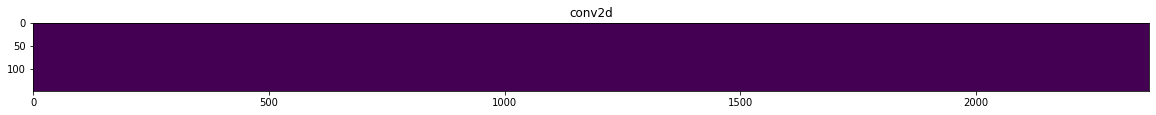

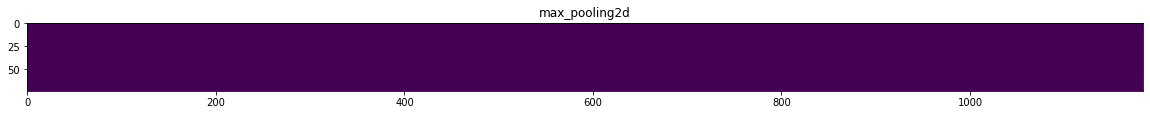

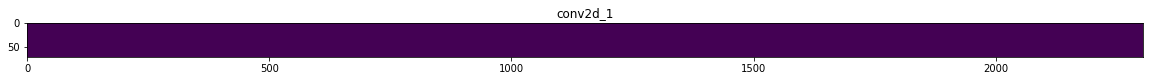

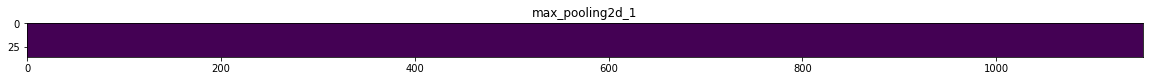

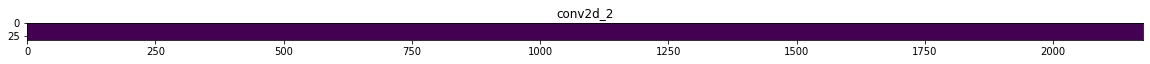

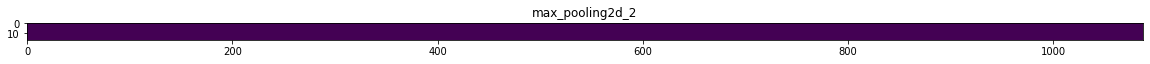

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  #prediction process
  path = "./" + fn
  img = image.load_img(path, target_size = (150, 150))
  x = image.img_to_array(img) / 255

  x = x.reshape((1, ) + x.shape)

  print(x.shape)
  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = output_layers)
  successive_feature_maps = visualization_model.predict(x)
  
  layer_names = [layer.name for layer in model.layers]
  
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1]  #number of features in feature map
      #the feature map has shape(1, size, size, n_features)
      size = feature_map.shape[1]
      #we will tile out images in this matrix
      display_grid = np.zeros((size, size * n_features))
      for i in range(n_features):
        #postprocess the feature to make it visually palatable
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype("uint8")
        #we will tile each filter into this big horizontal grid
        x = display_grid[:, 1 * size : (i + 1) * size]
      #display the grid
      scale = 20. / n_features
      plt.figure(figsize = (scale * n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect = "auto", cmap= "viridis")